# Pricing + Advertising

The goal is modeling a scenario in which a seller exploits advertising tools to attract more and more users to its website, thus increasing the number of possible buyers. The seller needs to learn simultaneously the conversion rate and the number of users the advertising tools can attract.

## 1.0

Imagine:
- one product to sell;
- three classes of users, where, for every user, we can observe the values of two binary features (feel free to choose the features and their domains);
- the conversion rate curve of each class of users;
- three subcampaigns, each with a different ad, to advertise the product, and each targeting a different class of users;
- there are three abrupt phases;
- for every abrupt phase and for every subcampaign, the probability distribution over the daily number of clicks for every value of budget allocated to that subcampaign.

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from project.dia_pckg.Config import *
from project.dia_pckg.Product import Product
from project.dia_pckg.Class import Class
from project.dia_pckg.Campaign import Campaign
from project.dia_pckg.SubCampaign import SubCampaign
from project.dia_pckg.User import User

In [2]:
# fixing random seed
np.random.seed(0)

In [3]:
# first of all we define our campaignfrom project.part_4.Env_4 import Env_4from project.part_4.Env_4 import Env_4from project.part_4.Env_4 import Env_4
campaign = Campaign(max_budget=seller_max_budget,
                    max_n_clicks=max_n_clicks)

# one product to sell
product = Product(name=product_name,
                  base_price=product_base_price,
                  max_price=product_max_price,
                  production_cost=product_production_cost)

# three classes of users:
class_names = list(classes.keys())
print('Classes:', class_names)

# initialization of the three classes
class_1 = Class(class_name=class_names[0], class_features=classes[class_names[0]], product=product, n_abrupt_phases=n_abrupts)
class_2 = Class(class_name=class_names[1], class_features=classes[class_names[1]], product=product, n_abrupt_phases=n_abrupts)
class_3 = Class(class_name=class_names[2], class_features=classes[class_names[2]], product=product, n_abrupt_phases=n_abrupts)

Classes: ['elegant', 'casual', 'sports']
---------------------------------
Class name: elegant
Feature values: ['>30', 'worker']
Number of abrupt phases: 3
---------------------------------

---------------------------------
Class name: casual
Feature values: ['<30', 'student']
Number of abrupt phases: 3
---------------------------------

---------------------------------
Class name: sports
Feature values: ['<30', 'worker']
Number of abrupt phases: 3
---------------------------------



/home/damiano/PycharmProjects/DataIntelligenceApplications/project/dia_pckg/Class.py:94: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/damiano/PycharmProjects/DataIntelligenceApplications/project/dia_pckg/Class.py:94: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/damiano/PycharmProjects/DataIntelligenceApplications/project/dia_pckg/Class.py:94: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


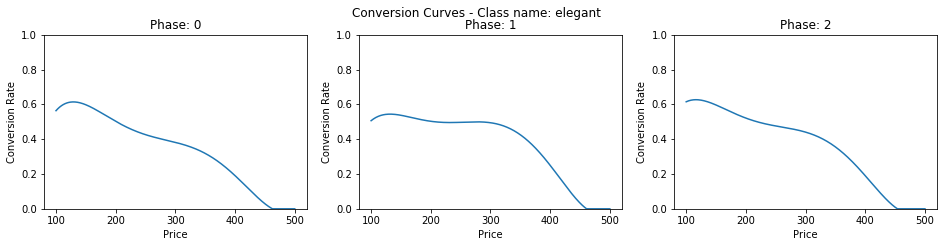

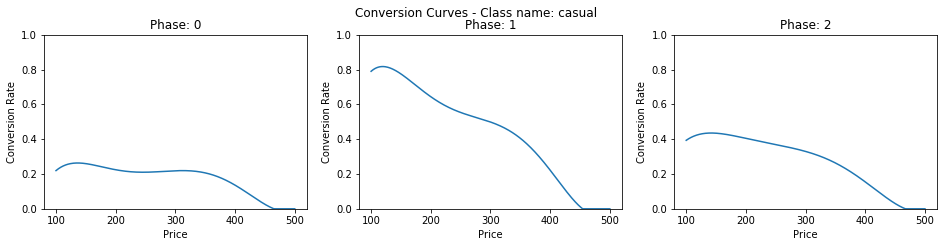

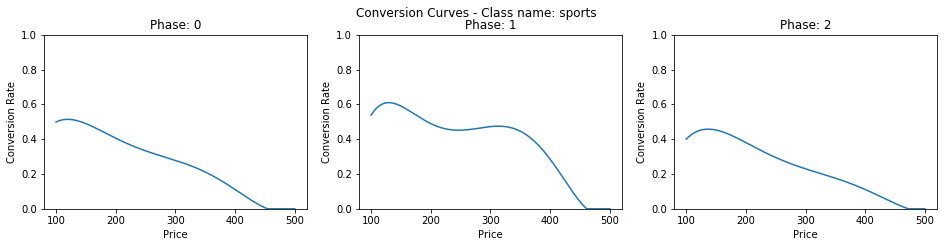

In [4]:
# for each class we can plot the conversion rate
class_1.plot_conversion_rate()
class_2.plot_conversion_rate()
class_3.plot_conversion_rate()

In [5]:
# definition of the three subcampaigns
subcampaign_1 = SubCampaign(class_obj=class_1, product=product, campaign=campaign)
subcampaign_2 = SubCampaign(class_obj=class_2, product=product, campaign=campaign)
subcampaign_3 = SubCampaign(class_obj=class_3, product=product, campaign=campaign)

/home/damiano/PycharmProjects/DataIntelligenceApplications/project/dia_pckg/SubCampaign.py:66: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/damiano/PycharmProjects/DataIntelligenceApplications/project/dia_pckg/SubCampaign.py:66: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/damiano/PycharmProjects/DataIntelligenceApplications/project/dia_pckg/SubCampaign.py:66: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


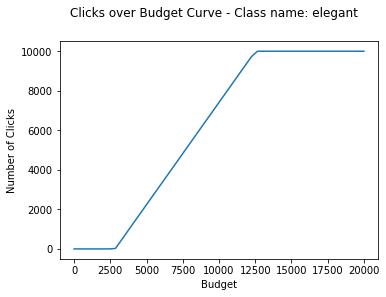

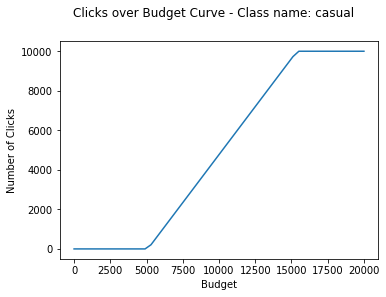

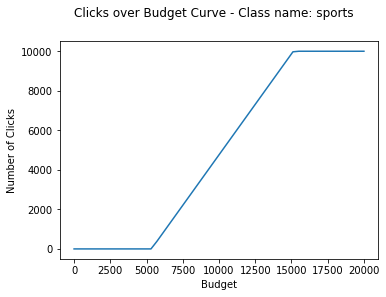

In [6]:
# for each subcampaign we plot the clicks over budget curve
subcampaign_1.plot_cob_curve()
subcampaign_2.plot_cob_curve()
subcampaign_3.plot_cob_curve()

## 2.0

Design a combinatorial bandit algorithm to optimize the budget allocation over the three subcampaigns to maximize the total number of clicks when, for simplicity, there is only one phase. Plot the cumulative regret.

## 3.0

Design a sliding-window combinatorial bandit algorithm for the case, instead, in which there are the three phases aforementioned. Plot the cumulative regret and compare it with the cumulative regret that a non-sliding-window algorithm would obtain.

## 4.0

Design a learning algorithm for pricing when the users that will buy the product are those that have clicked on the ads. Assume that the allocation of the budget over the three subcampaigns is fixed and there is only one phase (make this assumption also in the next steps). Plot the cumulative regret.

## 7.0

Do the same of Step 6 under the constraint that the seller charges a unique price to all the classes of users. Suggestion: for every possible price, fix this price and repeat the algorithm used in Step 6. Plot the cumulative regret when the algorithm learns both the conversion rate curves and the performance of the advertising subcampaigns.